# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [84]:
df = pd.read_csv("comprar_alquilar.csv")
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [85]:
df["ingresos"].describe()

count     202.000000
mean     4958.995050
std      1682.862556
min      2008.000000
25%      3513.750000
50%      4947.500000
75%      6374.500000
max      7984.000000
Name: ingresos, dtype: float64

([<matplotlib.axis.XTick at 0x1f46ae50df0>,
 [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')])

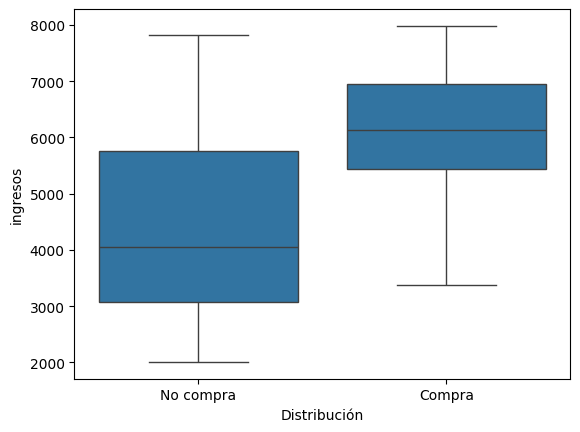

In [86]:
sns.boxplot(data=df,y="ingresos",x="comprar")
plt.xlabel("Distribución")
plt.xticks(ticks=np.arange(2),labels=("No compra","Compra"))

In [87]:
def box_continuas (variable):
    return sns.boxplot(data=df,y=variable,x="comprar"),plt.xlabel("Distribución"),plt.xticks(ticks=np.arange(2),labels=("No compra","Compra"))

(<Axes: xlabel='Distribución', ylabel='gastos_comunes'>,
 Text(0.5, 0, 'Distribución'),
 ([<matplotlib.axis.XTick at 0x1f46aeb07c0>,
  [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')]))

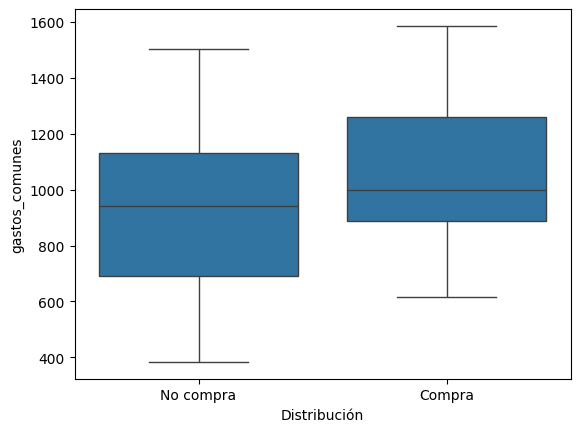

In [88]:
box_continuas("gastos_comunes")

(<Axes: xlabel='Distribución', ylabel='pago_coche'>,
 Text(0.5, 0, 'Distribución'),
 ([<matplotlib.axis.XTick at 0x1f46af35240>,
  [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')]))

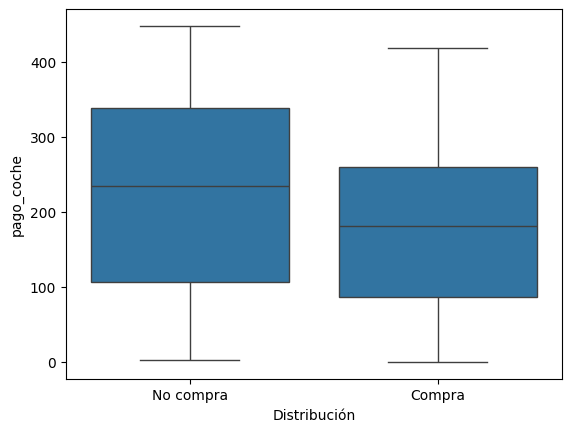

In [89]:
box_continuas("pago_coche")

(<Axes: xlabel='Distribución', ylabel='gastos_otros'>,
 Text(0.5, 0, 'Distribución'),
 ([<matplotlib.axis.XTick at 0x1f46afa32b0>,
  [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')]))

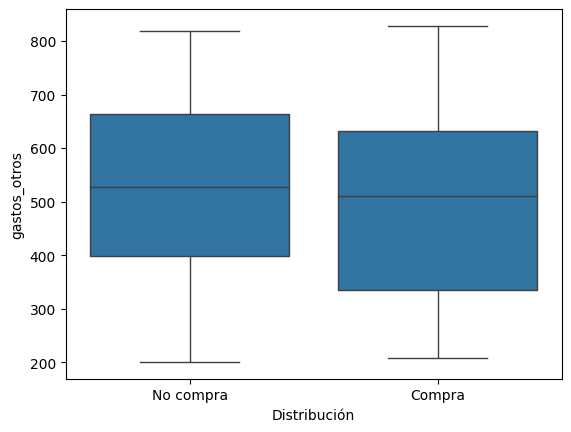

In [90]:
box_continuas("gastos_otros")

(<Axes: xlabel='Distribución', ylabel='ahorros'>,
 Text(0.5, 0, 'Distribución'),
 ([<matplotlib.axis.XTick at 0x1f46b025c60>,
  [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')]))

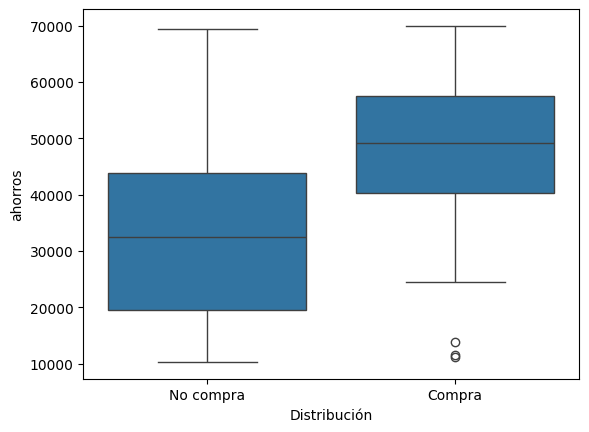

In [91]:
box_continuas("ahorros")

(<Axes: xlabel='Distribución', ylabel='vivienda'>,
 Text(0.5, 0, 'Distribución'),
 ([<matplotlib.axis.XTick at 0x1f46b0b4c40>,
  [Text(0, 0, 'No compra'), Text(1, 0, 'Compra')]))

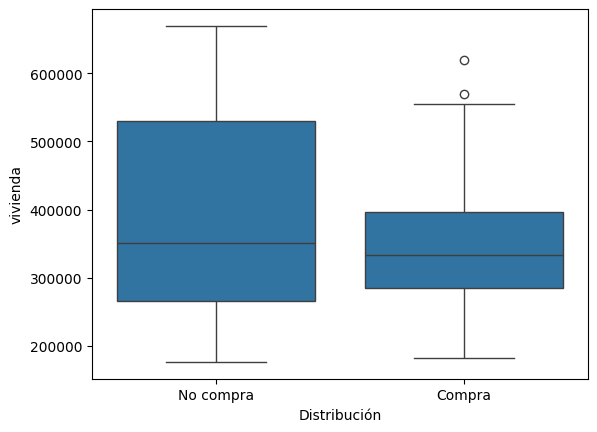

In [92]:
box_continuas("vivienda")

Text(0, 0.5, 'Cantidad')

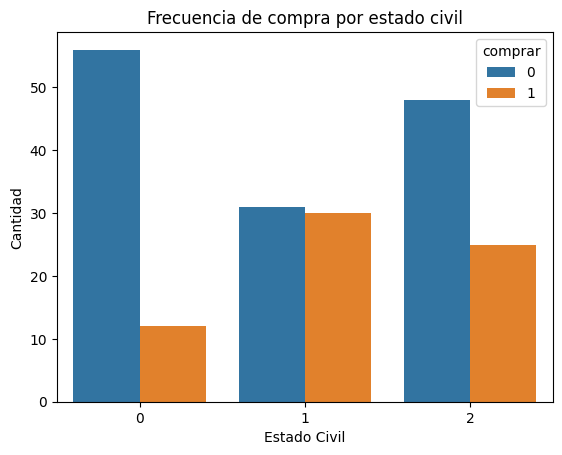

In [93]:
sns.countplot(x='estado_civil', hue='comprar', data=df)
plt.title('Frecuencia de compra por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')



In [94]:
def count_categ (variable):
    return sns.countplot(x=variable, hue='comprar', data=df),plt.title(f'Frecuencia de compra por{variable}'),plt.xlabel(f'{variable}'),plt.ylabel('Cantidad')


(<Axes: title={'center': 'Frecuencia de compra porhijos'}, xlabel='hijos', ylabel='Cantidad'>,
 Text(0.5, 1.0, 'Frecuencia de compra porhijos'),
 Text(0.5, 0, 'hijos'),
 Text(0, 0.5, 'Cantidad'))

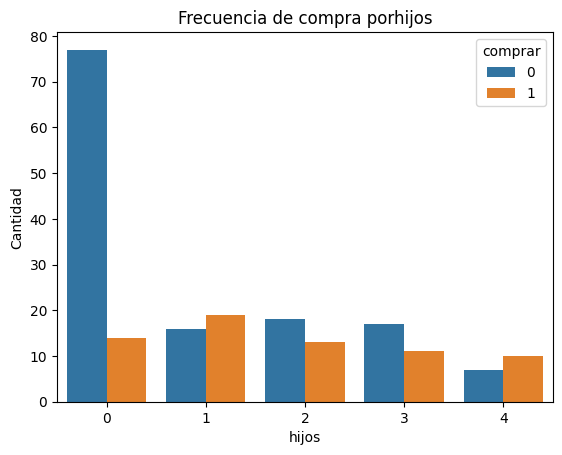

In [95]:
count_categ("hijos")

(<Axes: title={'center': 'Frecuencia de compra portrabajo'}, xlabel='trabajo', ylabel='Cantidad'>,
 Text(0.5, 1.0, 'Frecuencia de compra portrabajo'),
 Text(0.5, 0, 'trabajo'),
 Text(0, 0.5, 'Cantidad'))

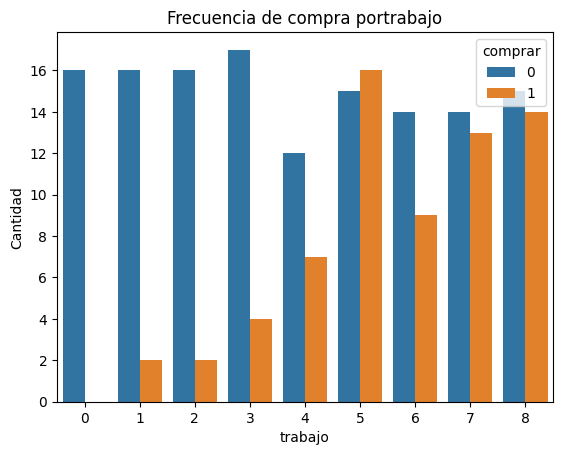

In [96]:
count_categ("trabajo")

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [97]:
X = df.drop(columns=["comprar"])
y = df["comprar"]

In [98]:
scaler = StandardScaler()
x_scal = scaler.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [99]:
pca = PCA(n_components=9)
pca.fit(x_scal)

PCA(n_components=9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [100]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_.cumsum()[4])

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]
0.8524062117714313


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

Text(0, 0.5, 'Varianza Explicada Acumulada')

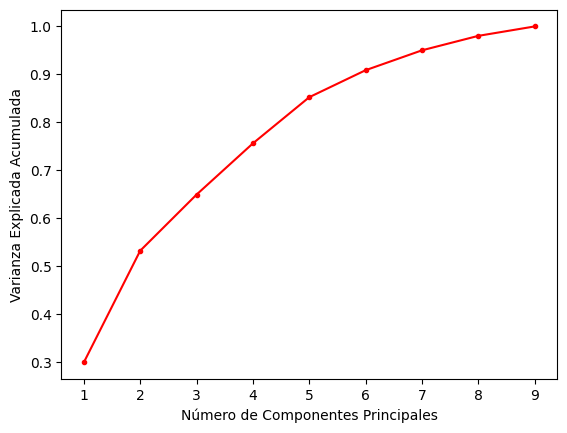

In [101]:
plt.plot( np.arange(1,10),pca.explained_variance_ratio_.cumsum(),marker='.', linestyle='-', color='r')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [102]:
df2 = pd.DataFrame(pca.components_,columns=X.columns)
df2

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,0.493720,0.318229,-0.123771,-0.111876,0.444650,0.462609,-0.252279,-0.259859,-0.290248
1,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
2,-0.091419,-0.363453,-0.516144,0.701986,0.191767,0.140513,-0.172885,0.112184,-0.036910
3,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
4,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
5,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
6,-0.154319,0.105598,-0.027333,-0.101876,-0.524584,0.641034,-0.212365,0.460067,-0.105053
7,-0.012732,0.010274,-0.061759,0.037977,-0.212759,0.260847,-0.204816,-0.532216,0.745630
8,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


<Axes: >

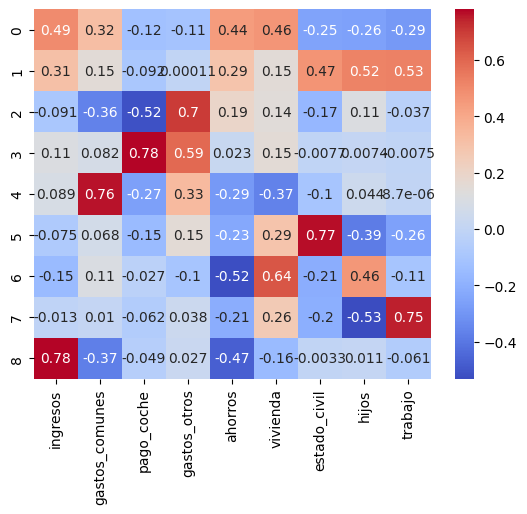

In [103]:
sns.heatmap(df2,cmap="coolwarm",annot=True)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle

In [105]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
pipe = Pipeline(steps =(("scaler",StandardScaler()),("pca", PCA(n_components=5)),("classifier",LogisticRegression())))


In [107]:
LR = pipe.fit(x_train,y_train)
pred = LR.predict(x_test)
predt = LR.predict(x_train)

In [108]:
print('accuracy_score_train:', accuracy_score(y_train,predt))
print('accuracy_score_test:', accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy_score_train: 0.8136645962732919
accuracy_score_test: 0.7560975609756098
[[21  3]
 [ 7 10]]


In [80]:
RF_params = {
    "scaler":[StandardScaler()],
    "pca":[PCA()],
    "pca__n_components":[3,4,5,6,7,8],
    "classifier":[LogisticRegression()],
    "classifier__C":[0.01,0.5,1,5]
    
}

gs = GridSearchCV(estimator=pipe,param_grid=RF_params,cv=5,verbose=2)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=3, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=3, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=3, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=3, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=3, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=4, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier=LogisticRegression(), classifier__C=0.01, pca=PCA(), pca__n_components=4, scaler=StandardS

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier': [LogisticRegression()],
                         'classifier__C': [0.01, 0.5, 1, 5], 'pca': [PCA()],
                         'pca__n_components': [3, 4, 5, 6, 7, 8],
                         'scaler': [StandardScaler()]},
             verbose=2)

In [109]:
modelo_final = gs.best_estimator_
modelo_final.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('classifier', LogisticRegression(C=1))])

In [110]:
pred_final = modelo_final.predict(x_test)

In [111]:
print('accuracy_score_test:', accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))

accuracy_score_test: 0.9024390243902439
[[24  0]
 [ 4 13]]


In [112]:
filename = "modelo_final.pkl"
with open(filename,"wb")as archivo:
    pickle.dump(modelo_final,archivo)